In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/EmployeeAttrition.csv")

In [3]:
df.shape

(1470, 35)

In [4]:
# i want to identify null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# finding all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

# Manually doing label encoding

In [7]:
lable_map={'BusinessTravel': {'Non-Travel':0, 
                              'Travel_Rarely':1, 
                              'Travel_Frequently':2}
                              }
df.replace(lable_map ,inplace=True)

/var/folders/54/gfhqd5h505l__hz49w789hjr0000gn/T/ipykernel_49531/1026457342.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(lable_map ,inplace=True)


In [8]:
df['BusinessTravel'].unique()

array([1, 2, 0])

# doing one hot encoding

In [9]:
df_ohe = pd.get_dummies(df)

In [10]:
df.shape, df_ohe.shape

((1470, 35), (1470, 55))

In [11]:
# remove columns which have single value
sing_col = df_ohe.columns[df_ohe.nunique() == 1]

In [12]:
sing_col

Index(['EmployeeCount', 'StandardHours', 'Over18_Y'], dtype='object')

In [13]:
df_ohe.drop(sing_col , axis=1,inplace=True)

In [14]:
df_ohe.shape

(1470, 52)

In [15]:
# drop the id columns
df_ohe.drop(['EmployeeNumber'],axis=1,inplace=True)

In [16]:
df_ohe.drop_duplicates(inplace=True)

In [17]:
df_ohe.shape

(1470, 51)

In [18]:
cat_col = df_ohe.columns[df_ohe.nunique() < 10]
cont_col = df_ohe.columns[df_ohe.nunique() >= 10]

In [19]:
cat_col.shape, cont_col.shape

((38,), (13,))

# Outliers detection
This data is used for supervised learning

Target column = 'Attrition' (Y)

All other columns are features or input columns (X)

In [20]:
X = df_ohe.drop(['Attrition_Yes','Attrition_No'],axis=1)
Y = df_ohe['Attrition_Yes']

In [21]:
X.shape, Y.shape

((1470, 49), (1470,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,
                                    test_size=0.3,
                                    random_state=7)

In [23]:
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((1029, 49), (441, 49), (1029,), (441,))

##### TO do standarization we can do two things
- 1  is we can use formula 
- 2 is we can use standard scaler form sklearn library

In [24]:
# Manually
manual_x_Train= X_train+X_train.mean()/X_train.std()
manual_y_Test= Y_test+Y_test.mean()/Y_test.std()


In [25]:
manual_x_Train.shape , manual_y_Test.shape

((1029, 49), (441,))

In [26]:
# using standard scaler from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train,Y_train)

,copy,True
,with_mean,True
,with_std,True


In [27]:
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()
X_train_sc.iloc[:,:] = sc.transform(X_train.iloc[:,:])
X_test_sc.iloc[:,:] = sc.transform(X_test.iloc[:,:])

/var/folders/54/gfhqd5h505l__hz49w789hjr0000gn/T/ipykernel_49531/3737529239.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.76274254  0.54384362 -1.31679719 ... -1.09789827 -0.11285314
  2.07613605]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_sc.iloc[:,:] = sc.transform(X_train.iloc[:,:])
/var/folders/54/gfhqd5h505l__hz49w789hjr0000gn/T/ipykernel_49531/3737529239.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.19302102 -2.06678163 -0.19302102 ...  1.6807396  -0.19302102
 -0.19302102]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_sc.iloc[:,:] = sc.transform(X_train.iloc[:,:])
/var/folders/54/gfhqd5h505l__hz49w789hjr0000gn/T/ipykernel_49531/3737529239.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and

# Statistical methods for detecting outliers


- Z- score ( standard scaler )

- IQR based method

### After standard scaler our assumption is 99% is between -3 to +3

- so values less than -3 and greater than +3 are considered as outlier

- We are going to impute the outliers
- when value < -3 then replace with -3
- when value greater than +3 then replace with +3

Write python code  to perform impute operation on every column one by one

# using z score to find outliers

In [28]:

def impute_outlier_std(df,col):
    df.loc[df[col]>3, col] =3
    df.loc[df[col]<-3, col] =-3
    return df

In [29]:
df_impute = X_train_sc.copy()
for col in df_impute.columns:
    df_impute = impute_outlier_std(df_impute,col)

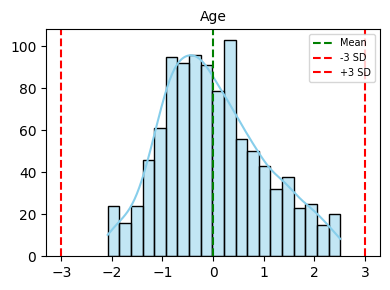

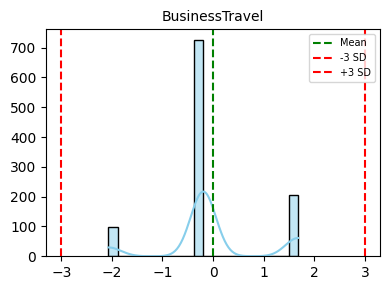

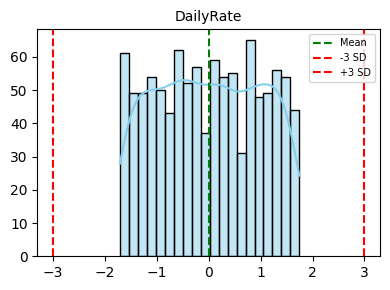

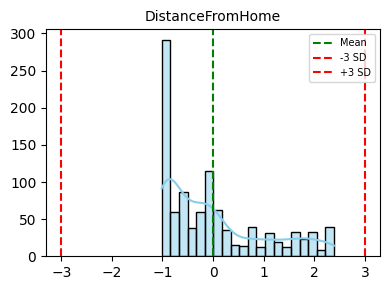

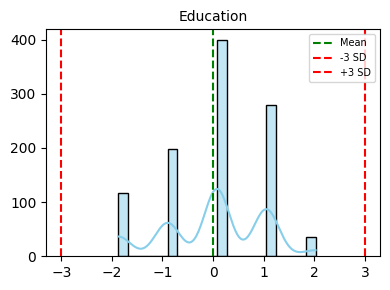

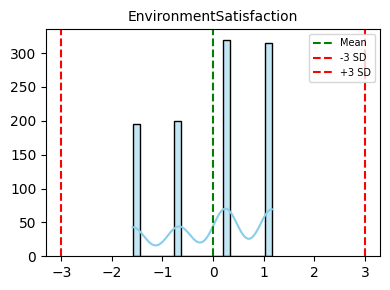

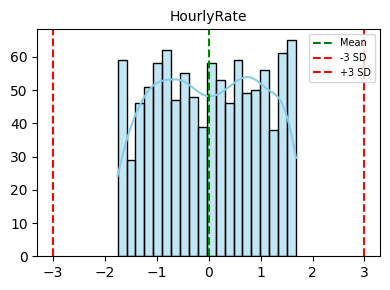

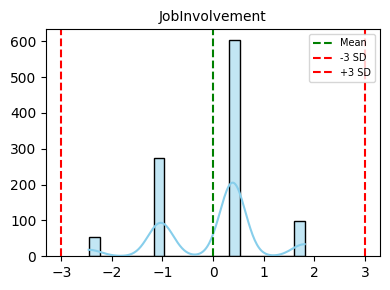

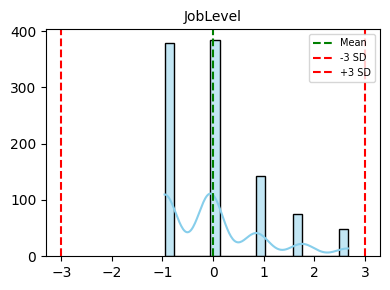

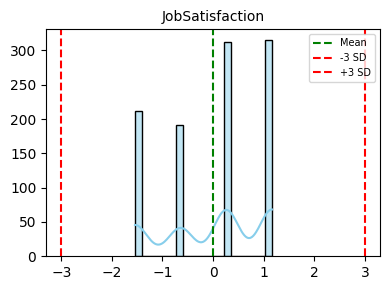

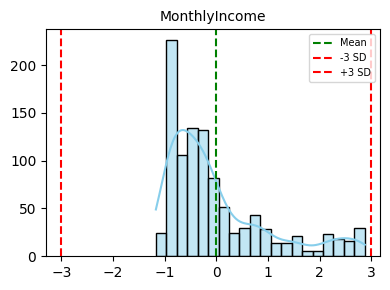

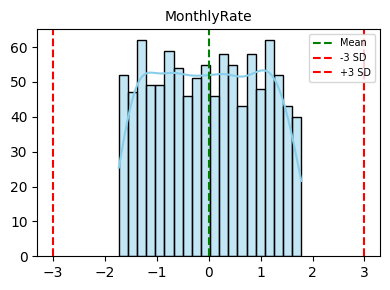

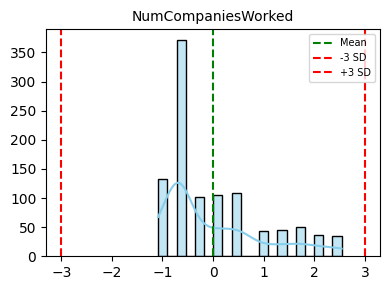

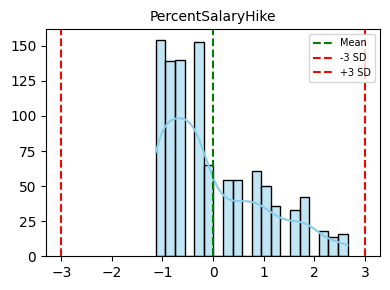

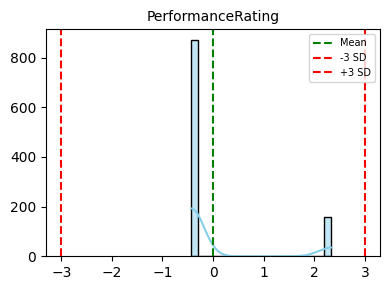

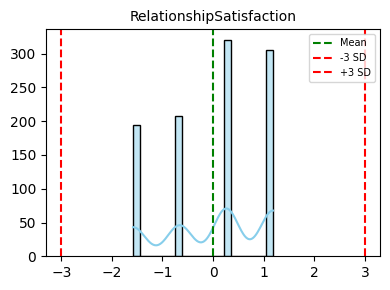

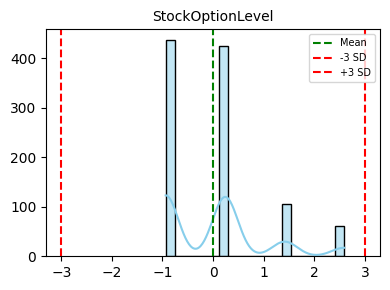

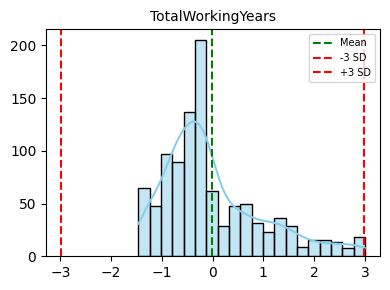

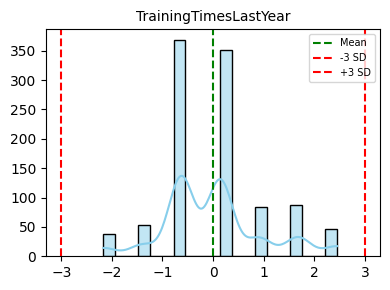

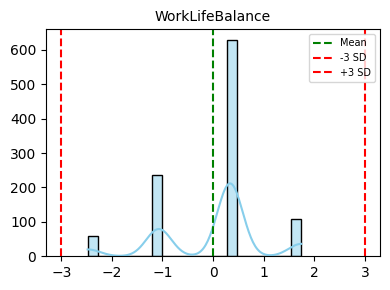

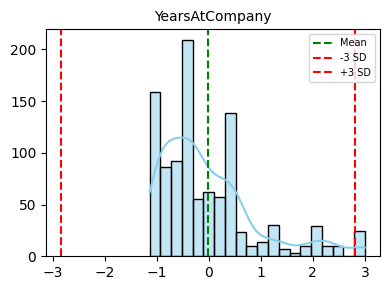

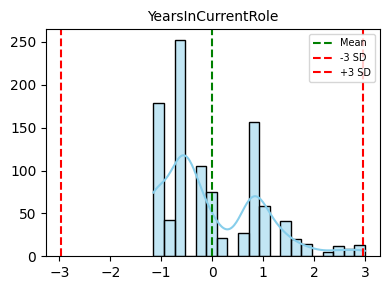

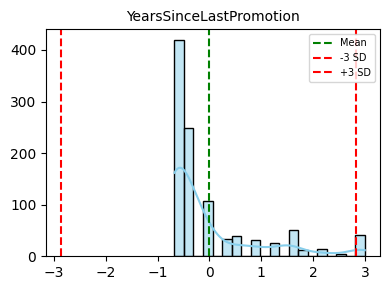

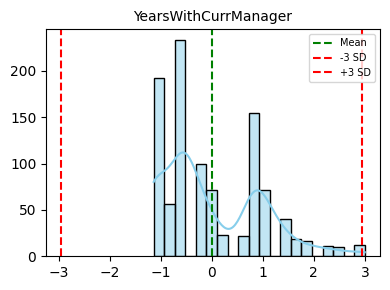

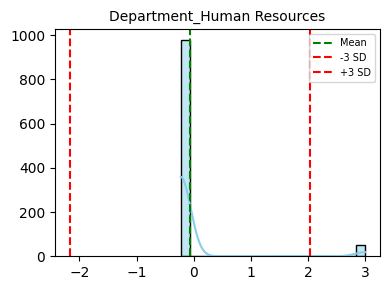

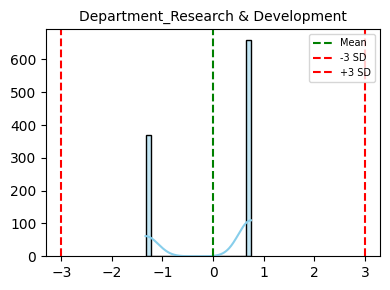

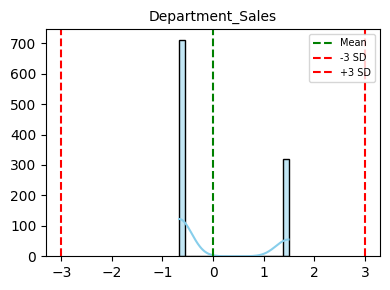

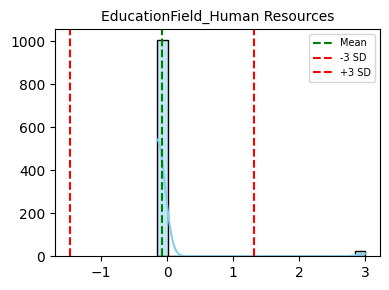

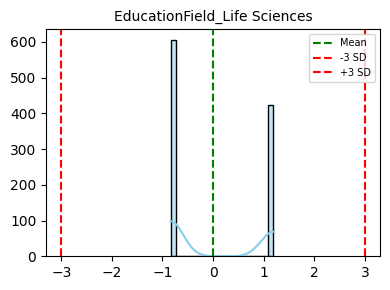

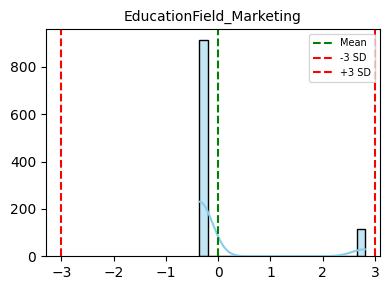

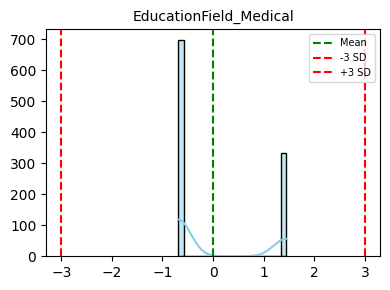

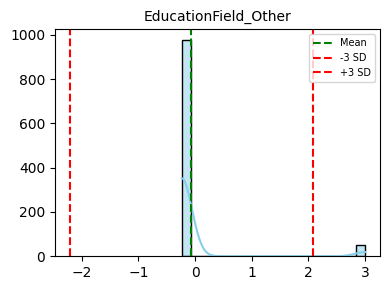

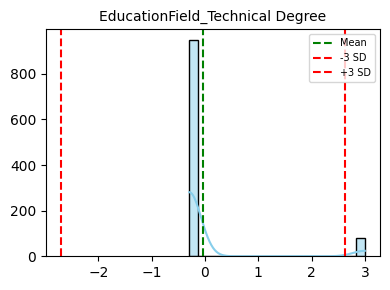

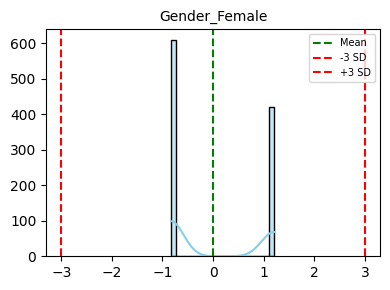

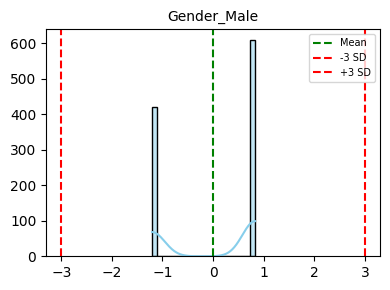

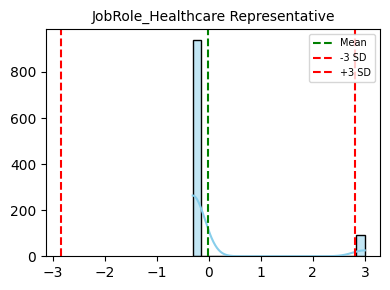

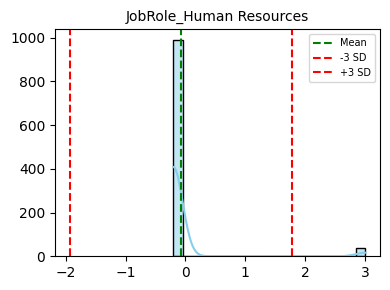

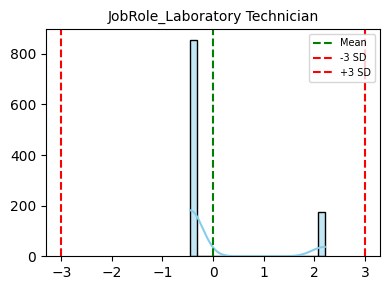

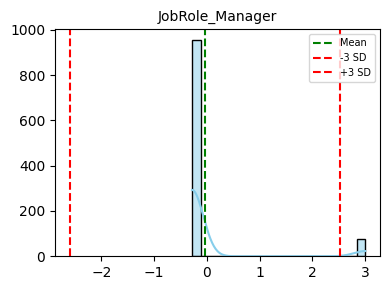

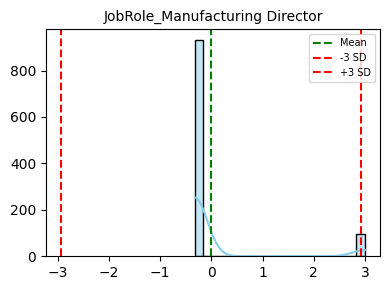

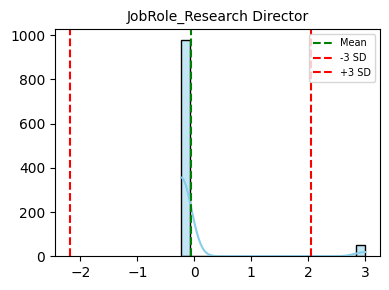

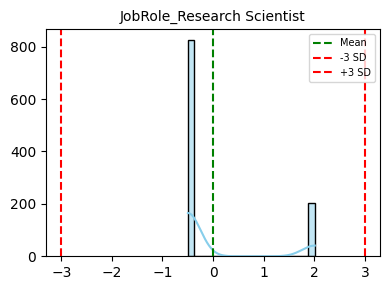

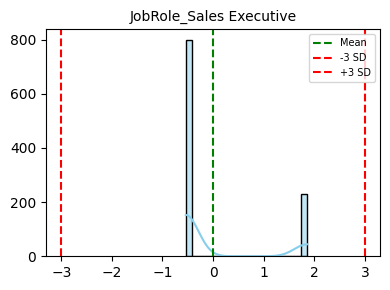

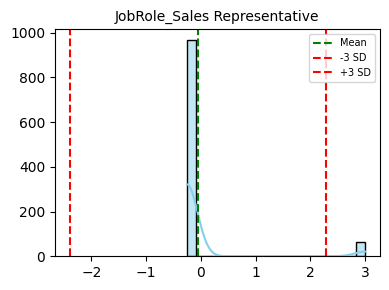

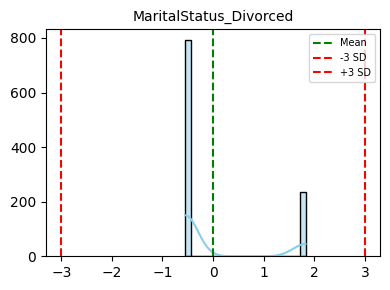

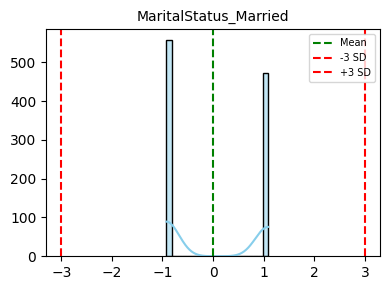

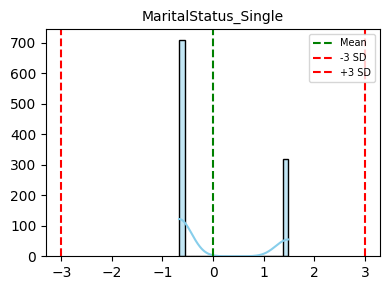

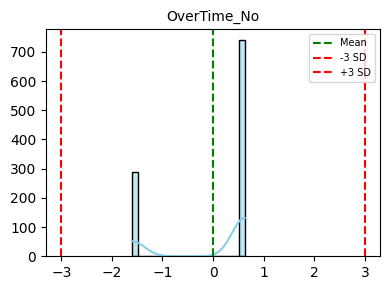

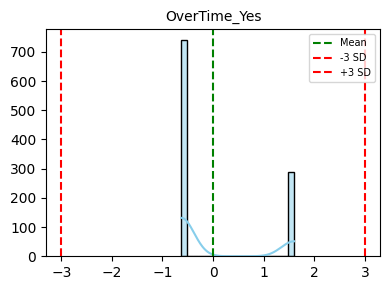

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_outlier_distribution(df, col, std_factor=3):
    data = df[col].dropna()
    if data.nunique() <= 1:  # skip constant columns
        return

    mean = np.mean(data)
    std = np.std(data)

    lower_bound = mean - std_factor * std
    upper_bound = mean + std_factor * std

    # Smaller figure size for compact viewing
    plt.figure(figsize=(4, 3))  # ↓ reduced from (8,5)
    sns.histplot(data, kde=True, bins=20, color='skyblue', edgecolor='black')

    # Vertical lines
    plt.axvline(mean, color='green', linestyle='--', label='Mean')
    plt.axvline(lower_bound, color='red', linestyle='--', label=f'-{std_factor} SD')
    plt.axvline(upper_bound, color='red', linestyle='--', label=f'+{std_factor} SD')

    plt.title(f"{col}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.legend(fontsize=7)
    plt.tight_layout()
    plt.show()

# Loop through columns
for col in df_impute.columns:
    plot_outlier_distribution(df_impute, col)


In [31]:
df_impute.describe()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,...,1029.000000,1029.000000,1.029000e+03,1.029000e+03,1029.000000,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03
mean,-1.225669e-16,1.506192e-16,1.381035e-17,1.208406e-16,1.035777e-17,1.087565e-16,-3.349011e-16,-1.622717e-16,-1.760820e-16,-2.762071e-17,...,-0.007829,-0.067442,-2.762071e-17,-2.244183e-17,-0.056068,-1.381035e-17,9.149360e-17,-6.905177e-17,2.934700e-17,1.087565e-16
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,...,0.976343,0.708014,1.000486e+00,1.000486e+00,0.780829,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-2.082943e+00,-2.066782e+00,-1.710005e+00,-1.015043e+00,-1.873097e+00,-1.590361e+00,-1.753963e+00,-2.457168e+00,-9.579410e-01,-1.543417e+00,...,-0.324443,-0.230704,-4.972652e-01,-5.380276e-01,-0.255377,-5.470306e-01,-9.205416e-01,-6.718184e-01,-1.600173e+00,-6.249324e-01
25%,-7.695499e-01,-1.930210e-01,-8.655650e-01,-8.933794e-01,-8.981768e-01,-6.725364e-01,-8.703262e-01,-1.034306e+00,-9.579410e-01,-6.410441e-01,...,-0.324443,-0.230704,-4.972652e-01,-5.380276e-01,-0.255377,-5.470306e-01,-9.205416e-01,-6.718184e-01,-1.600173e+00,-6.249324e-01
50%,-1.128531e-01,-1.930210e-01,2.097329e-02,-2.850632e-01,7.674296e-02,2.452885e-01,1.331037e-02,3.885562e-01,-5.194717e-02,2.613285e-01,...,-0.324443,-0.230704,-4.972652e-01,-5.380276e-01,-0.255377,-5.470306e-01,-9.205416e-01,-6.718184e-01,6.249324e-01,-6.249324e-01
75%,6.532931e-01,-1.930210e-01,8.678898e-01,5.665794e-01,1.051663e+00,1.163113e+00,8.478561e-01,3.885562e-01,8.540466e-01,1.163701e+00,...,-0.324443,-0.230704,-4.972652e-01,-5.380276e-01,-0.255377,-5.470306e-01,1.086317e+00,1.488498e+00,6.249324e-01,1.600173e+00
max,2.513934e+00,1.680740e+00,1.746999e+00,2.391528e+00,2.026583e+00,1.163113e+00,1.682402e+00,1.811418e+00,2.666034e+00,1.163701e+00,...,3.000000,3.000000,2.010999e+00,1.858641e+00,3.000000,1.828051e+00,1.086317e+00,1.488498e+00,6.249324e-01,1.600173e+00


# USING IQR

In [32]:
def impute_outlier_iqr(df,col):
    q1,q3 = df[col].quantile([0.25,0.75])
    iqr = q3 -q1
    min_val_value = q1 - 1.5 * iqr
    max_val_value = q3 + 1.5 * iqr

    df.loc[df[col]>max_val_value, col] =max_val_value
    df.loc[df[col]<min_val_value, col] =min_val_value
    return df

Box plots showing potential outliers (before IQR imputation):


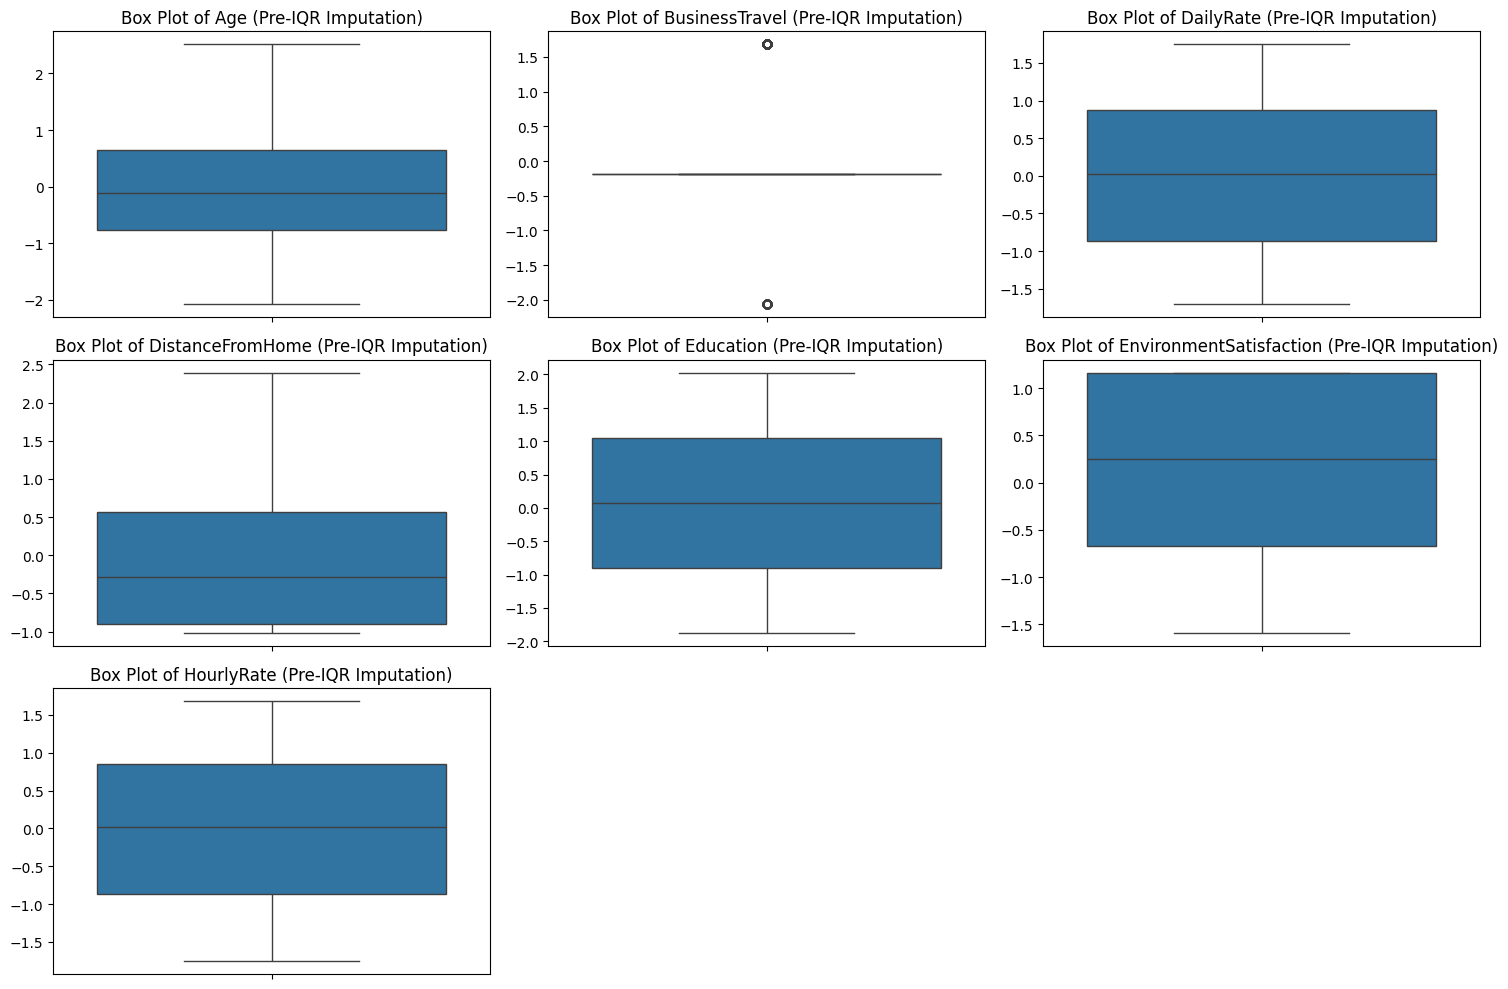


DataFrame statistics after IQR imputation:


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate
count,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03,1.029000e+03
mean,-1.225669e-16,-1.930210e-01,1.381035e-17,1.208406e-16,1.035777e-17,1.087565e-16,-3.349011e-16
std,1.000486e+00,1.721682e-15,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-2.082943e+00,-1.930210e-01,-1.710005e+00,-1.015043e+00,-1.873097e+00,-1.590361e+00,-1.753963e+00
25%,-7.695499e-01,-1.930210e-01,-8.655650e-01,-8.933794e-01,-8.981768e-01,-6.725364e-01,-8.703262e-01
50%,-1.128531e-01,-1.930210e-01,2.097329e-02,-2.850632e-01,7.674296e-02,2.452885e-01,1.331037e-02
75%,6.532931e-01,-1.930210e-01,8.678898e-01,5.665794e-01,1.051663e+00,1.163113e+00,8.478561e-01
max,2.513934e+00,-1.930210e-01,1.746999e+00,2.391528e+00,2.026583e+00,1.163113e+00,1.682402e+00


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_cols are the first 7 columns as before
numerical_cols = X_train_sc.columns[0:7]

print("Box plots showing potential outliers (before IQR imputation):")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=X_train_sc[col])
    plt.title(f'Box Plot of {col} (Pre-IQR Imputation)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Apply the impute_outlier_iqr function to a copy of df_ohe_std
df_iqr_imputed = X_train_sc.copy()
for col in numerical_cols:
    df_iqr_imputed = impute_outlier_iqr(df_iqr_imputed, col)

print("\nDataFrame statistics after IQR imputation:")
display(df_iqr_imputed[numerical_cols].describe())